# 🧠 What is LSTM?
LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) designed to handle sequential data and remember important information over long periods. Traditional RNNs struggle with long sequences because of the vanishing or exploding gradient problem, making them forget earlier information. LSTM solves this using a special memory cell and three gates: forget gate, input gate, and output gate.

The forget gate decides which past information to erase.

The input gate controls what new information to store.

The output gate decides what part of the memory to pass on.

This gated mechanism allows LSTM to retain relevant information and ignore noise, making it ideal for tasks like text generation, language translation, speech recognition, and time series forecasting.

At each time step, LSTM takes in the current input and the previous output, updates its memory, and produces a new output. It uses functions like sigmoid and tanh to control data flow.

Thanks to this architecture, LSTM can track patterns over long sequences better than standard RNNs. It's widely used in NLP, finance, and healthcare where context across time is crucial.

# ⚠️ Disadvantages of RNNs: Vanishing & Exploding Gradients

## 1️⃣ Vanishing Gradient Problem
What happens:
When training RNNs on long sequences, gradients during backpropagation become very small (close to zero).

Effect:

The RNN stops learning long-term dependencies.

It forgets earlier words/events in the sequence.

Model performance suffers on tasks needing memory (e.g., language modeling, translation).

Example:
If a word at time step 1 affects time step 50, the network can't connect them well — earlier context is lost.

## 2️⃣ Exploding Gradient Problem
What happens:
Gradients grow very large during backpropagation.

Effect:

Causes unstable training.

The model’s weights can blow up (become inf or NaN).

Leads to poor convergence or failure to train.

# 🧠 LSTM Gates

LSTM (Long Short-Term Memory) uses **three gates** to control how information flows through the network:

- Forget Gate
- Input Gate
- Output Gate

---

## 🔐 Forget Gate

**Purpose:** Decides what information from the previous memory should be forgotten.

**Formula:**

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

Where:  
- \( f_t \): forget gate output  
- \( h_{t-1} \): previous hidden state  
- \( x_t \): current input  
- \( \sigma \): sigmoid activation (values between 0 and 1)

---

## ✍️ Input Gate & Candidate Memory

**Purpose:** Controls how much new information to store in the cell state.

**Formulas:**

_Input gate:_

$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$

_Candidate values to add:_

$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

_Update the cell state:_

$$
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
$$

---

## 📤 Output Gate

**Purpose:** Decides what part of the memory cell to output.

**Formulas:**

_Output gate:_

$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$

_Output hidden state:_

$$
h_t = o_t \cdot \tanh(C_t)
$$

---

## ✅ Summary Table

| Gate           | Formula                                                   | Purpose                        |
|----------------|------------------------------------------------------------|--------------------------------|
| Forget Gate    | $$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $$         | What to forget                 |
| Input Gate     | $$ i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) $$         | What to update                 |
| Candidate      | $$ \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) $$  | New info to be added           |
| Cell State     | $$ C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t $$      | Updated memory                 |
| Output Gate    | $$ o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) $$         | What to expose as output       |
| Hidden State   | $$ h_t = o_t \cdot \tanh(C_t) $$                           | Final output                   |


# Sample Code

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ananthr1_weather_prediction_path = kagglehub.dataset_download('ananthr1/weather-prediction')

print('Data source import complete.')


100%|██████████| 11.5k/11.5k [00:00<00:00, 13.5MB/s]

Extracting files...
Data source import complete.


In [ ]:
ananthr1_weather_prediction_path

'/root/.cache/kagglehub/datasets/ananthr1/weather-prediction/versions/1'

In [ ]:
path=ananthr1_weather_prediction_path+"/seattle-weather.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [ ]:
len(training_set)

1461

In [ ]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [ ]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [ ]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Initializing the LSTM model
regressor = Sequential()

# Adding the first LSTM layer and Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding additional LSTM layers with Dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))  # Final LSTM layer (return_sequences=False by default)
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [ ]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 241.5568 - val_loss: 238.3651
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 93.9872 - val_loss: 144.9498
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 66.9921 - val_loss: 117.6349
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 60.4957 - val_loss: 100.8085
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 54.5277 - val_loss: 91.1878
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 59.8623 - val_loss: 84.8589
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 55.1166 - val_loss: 81.4496
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 55.6577 - val_loss: 78.9259
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 55.9160 - val_loss: 78.0340
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 52.5933 - val_loss: 76.7139
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 55.8263 - val_loss: 76.0935
Epoch 12/100
25/25 ━━━━━━

In [ ]:
his = pd.DataFrame(history.history)

In [ ]:
his.head()

,loss,val_loss
0,206.731796,238.365051
1,87.104454,144.949829
2,64.924240,117.634865
3,57.657433,100.808479
4,55.579224,91.187836


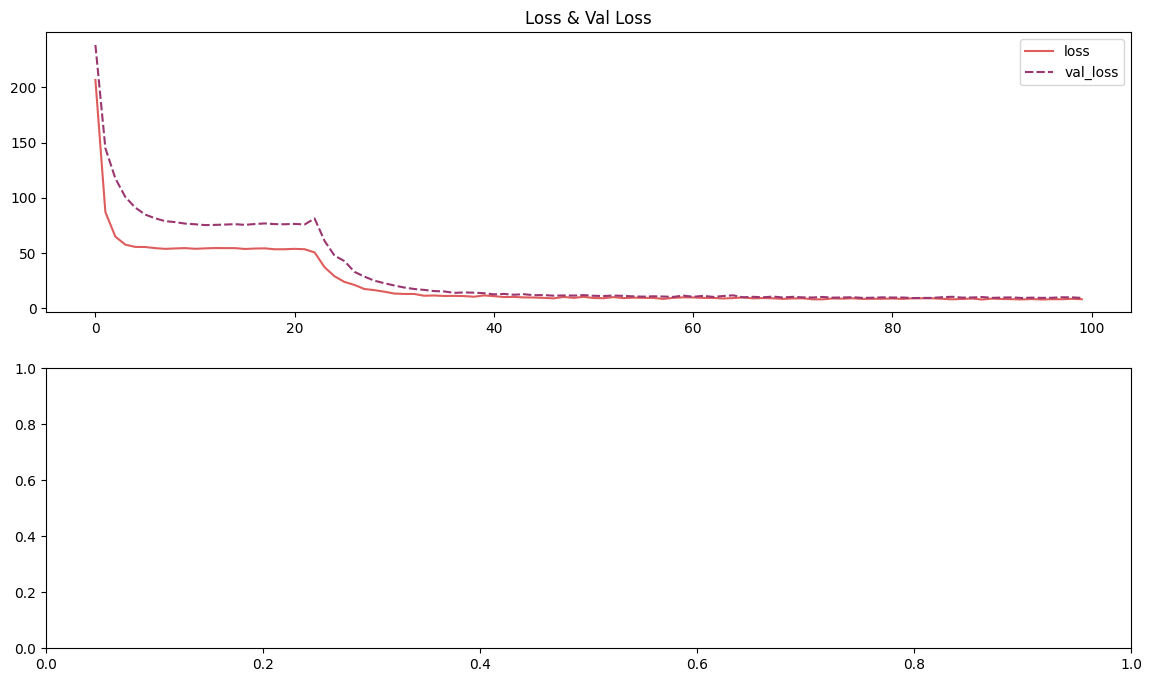

In [ ]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");



In [ ]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


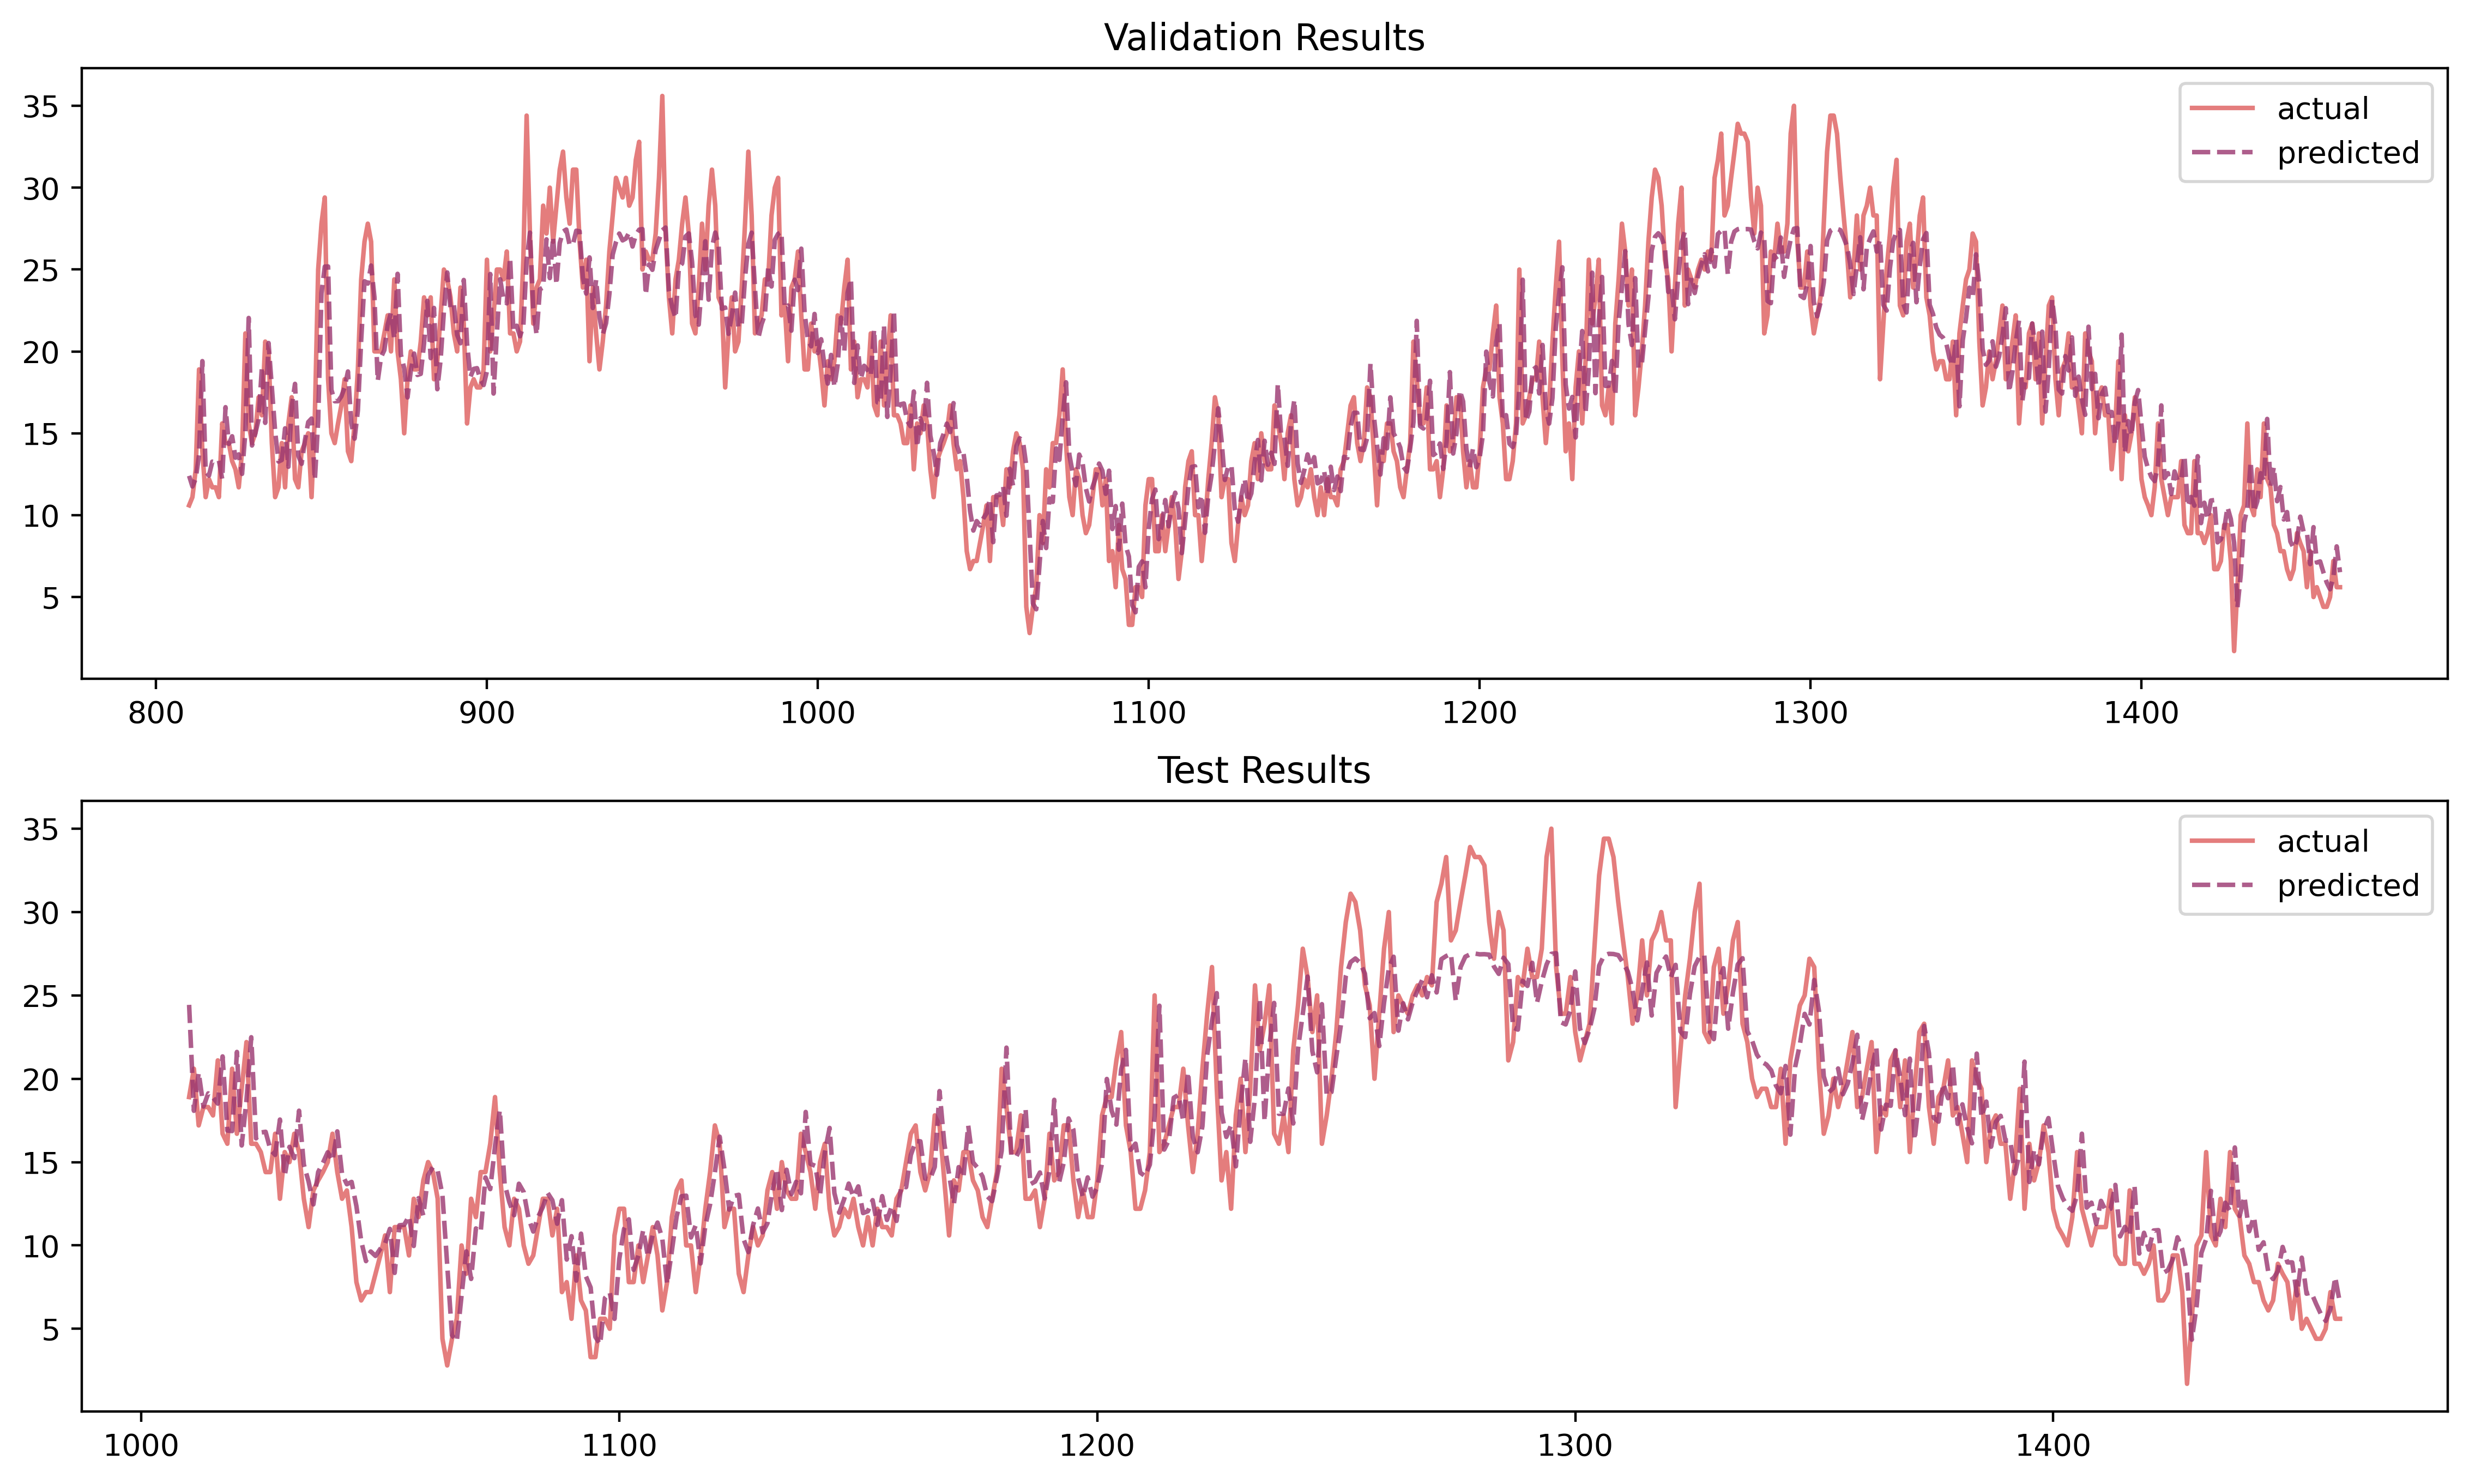

In [ ]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);